In [12]:
#importing all the libraries and our datafile
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report

survival_df = pd.read_csv("../Resources/cleaned_data_survival_prediction.csv")

In [3]:
survival_df.head()

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,Caucasian,M,180.3,Floor,92,admit,CTICU,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.420000,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,67.0,27.560000,0,Caucasian,M,190.5,Accident & Emergency,95,admit,Med-Surg ICU,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
3,72.0,28.257052,1,Hispanic,F,154.9,Operating Room / Recovery,113,admit,Med-Surg ICU,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory,0
4,46.0,25.845717,0,Hispanic,M,167.6,Accident & Emergency,92,admit,CTICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [4]:
#labeling our X variable to drop our target variable
#setting our y variable to be our target variable
X = survival_df.drop('hospital_death', axis=1)
y = survival_df['hospital_death']

In [6]:
#dummy-coding the rest of our X categorical variables
X = pd.get_dummies(X)

### Balance the data set - OVERsampling

#### Since our data was not evenly distributed, we decided to use a method called OVERsampling to help compensate.

In [7]:
#Balance Data - oversampling
ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 52044, 1: 4891})
Resample dataset shape Counter({0: 52044, 1: 52044})


In [8]:
#Splitting our data into train and test
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=40)

#Running RandomForestClassifier
clf = RandomForestClassifier(random_state=40, n_estimators=50).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.9875105679809392


In [9]:
#Testing our model
y_true = y_test
y_pred = clf.predict(X_test)

print('Test Acc: %.3f' % clf.score(X_test, y_test))
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

Test Acc: 0.988
[[12665   321]
 [    4 13032]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12986
           1       0.98      1.00      0.99     13036

    accuracy                           0.99     26022
   macro avg       0.99      0.99      0.99     26022
weighted avg       0.99      0.99      0.99     26022



### Since there is a large amount of features, we want to see which features are the most important. Below we are running feature importance. 

In [10]:
importance = clf.feature_importances_

Feature: 0, Score: 0.01856
Feature: 1, Score: 0.01374
Feature: 2, Score: 0.00200
Feature: 3, Score: 0.01005
Feature: 4, Score: 0.01231
Feature: 5, Score: 0.01435
Feature: 6, Score: 0.01324
Feature: 7, Score: 0.01361
Feature: 8, Score: 0.01903
Feature: 9, Score: 0.00194
Feature: 10, Score: 0.00092
Feature: 11, Score: 0.00746
Feature: 12, Score: 0.01913
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.02345
Feature: 15, Score: 0.01299
Feature: 16, Score: 0.00761
Feature: 17, Score: 0.01139
Feature: 18, Score: 0.01350
Feature: 19, Score: 0.01393
Feature: 20, Score: 0.03601
Feature: 21, Score: 0.00944
Feature: 22, Score: 0.01220
Feature: 23, Score: 0.00941
Feature: 24, Score: 0.01196
Feature: 25, Score: 0.01737
Feature: 26, Score: 0.01332
Feature: 27, Score: 0.00921
Feature: 28, Score: 0.02037
Feature: 29, Score: 0.00880
Feature: 30, Score: 0.01434
Feature: 31, Score: 0.01548
Feature: 32, Score: 0.01088
Feature: 33, Score: 0.00281
Feature: 34, Score: 0.01762
Feature: 35, Score: 0.01023
Fe

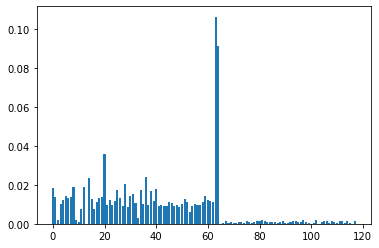

In [13]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()